In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import log, pi, sqrt
from scipy.stats import multivariate_normal
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
#import pydotplus -> baixar esse cara
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import GridSearchCV

np.random.seed(12345)

# Regressão Logística

In [80]:
def yPred(w, x):
    yPred = 1/(1+np.exp(-x @ w))
    return yPred

In [111]:
def regLogGD(x, y, n_epochs, alpha):
    erroQM = []
    wPrev = np.zeros(x.shape[1]+1)
    aux = np.ones((x.shape[0], 1))
    x = np.hstack((aux, x))
    
    for epochs in range (0,n_epochs):
        suma = 0
        sumErro = 0
        for i in range(0, x.shape[0]):
            sumErro = sumErro + (y[i]-yPred(wPrev,x[i]))**2
            suma = suma +  (y[i]-yPred(wPrev,x[i]))*np.transpose(x[i])
        w = np.transpose(wPrev) + alpha*(1/x.shape[0])*suma
        erroEp = ((1/(2*x.shape[0]))*sumErro)
        erroQM.append(erroEp)
        wPrev = w
    return wPrev, erroQM

In [112]:
def predictLR(w, x):
    yPredito = []
    aux = np.ones((x.shape[0], 1))
    x = np.hstack((aux, x))
    for i in x:
        if(yPred(w,i)>=0.5):
            yPredito.append(1)
        else:
            yPredito.append(0)
    return yPredito

In [113]:
def accuracy(y, y_pred):
    tot = [1 for x,z in zip(y,y_pred) if x == z]

In [124]:
data = pd.read_csv("ex1.csv", header = None).values
lista = [[1,1],[1,0],[0,1],[2,4],[0.5,3],[0,0]]
X = data[:,0:-1]
Y = data[:,-1]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

In [128]:
w, erro = regLogGD(x_train, y_train, 1000, 0.001)
x_train.shape
results = predictLR(w, x_test)
print(np.array(results))
print(y_test)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0.
 1.]


In [129]:
tot = [1 for x,z in zip(y_test,results) if x == z]
(np.sum(np.array(tot))/len(y_test))


0.52

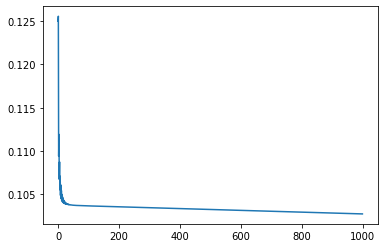

In [130]:
plt.plot(erro)

# Naive Bayes Gaussiano

In [5]:
def train(dataset, tamanho):
    classes = {}
    # Separando as classes
    for i in range(0, tamanho):
        row = [x for x in np.array(dataset.iloc[[i]])[0]]
        if row[-1] not in classes:
            classes[row[-1]] = []
        classes[row[-1]].append(row[:2])
    
    # Calculando média e covariancia
    mean_variance_classes = {}

    for key in classes.keys():
        mean_variance_classes[key] = {}
        mean_variance_classes[key]['mean'] = np.mean(np.array(classes[key]), axis=0)
        mean_variance_classes[key]['var'] = np.var(np.array(classes[key]), axis=0)             
    
    return mean_variance_classes

def predict(dict_means, tamanho, teste):
    # Ver onde vou encaixar esse somatório
    function = lambda mean, cov, x, pck: -0.5 * log((2*pi*cov)) - (1/(2*cov))*((x - mean)**2) + log(pck)
    probs = []
    pck = len(dict_means.keys())/tamanho;
    for key in dict_means.keys():
        somatorio = 0
        for i in range(0, len(dict_means[key]['mean'])):
            somatorio += function(dict_means[key]['mean'][i], dict_means[key]['var'][i], x[i], pck)
        probls.append({key: somatorio})

In [6]:
blobs2 = pd.read_csv("../data/blobs2.csv", names=["x1", "x2", "y"])
len_2 = blobs2.shape[0]
classes = train(blobs2, len_2)

FileNotFoundError: [Errno 2] File b'../data/blobs2.csv' does not exist: b'../data/blobs2.csv'

# Análise Discriminante Gaussiano (AGD)

# KNN

In [149]:
def distance_euclidian(x1, x2):
    return sqrt(np.sum([abs(i - j) for i, j in zip(x1,x2)]))

def distance_manhattan(x1, x2):
    return np.sum([abs(i-j) for i, j in zip(x1,x2)])

def getClasses(data):
    return pd.array(data[:,-1]).unique()

# Função para uma linha
def predict(data, teste, k, function):
    classes = getClasses(data)
    results = []
    for row in data:
        results.append([function(row[:-1], teste), row[-1]])
    results = sorted(results)
    dictClasses = {}
    for i in classes:
        dictClasses[i] = 0
    for i in range(0, k):
        for row in dictClasses.keys():
            if results[i][1] == row:
                dictClasses[row] += 1
    
    # retornar a chave que tem maior contagem
    minimus = [results[i][1] for i in range (0,k)]
    
    contClasses = [(x, minimus.count(x)) for x in set(minimus)]

    maximo = np.argmax(contClasses, axis=0)
    print(contClasses)
    
    return contClasses[maximo[1]][0]

# Função para um vetor de testes e então chama o predict
def getPredict(data, teste, k, function):
    predicted = [predict(data, row, k, function) for row in teste]
    return predicted

In [152]:
data = pd.read_csv("ex2data2.csv", header = None).values
lista = [[1,1],[1,0],[0,1],[2,4],[0.5,3],[0,0]]

results = getPredict(data, lista, 15, distance_euclidian)
results


[(0.0, 13), (1.0, 2)]
[(0.0, 10), (1.0, 5)]
[(0.0, 9), (1.0, 6)]
[(0.0, 13), (1.0, 2)]
[(0.0, 12), (1.0, 3)]
[(0.0, 2), (1.0, 13)]


[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]

# Árvore de Decisão

In [11]:
def calc_entropy(p):
    return - p * np.log2(p + 10 ** -6) - (1-p) * np.log2((1-p) + 10 ** -6)

def calc_gini(p):
    return 1 - p ** 2 - (1-p) ** 2

In [12]:
x, y = datasets.load_iris(return_X_y=True)
x = x[:,2:4]
np.random.seed(12345)

number_train = int(np.ceil(0.7*(x.shape[0])))
random_index = np.random.permutation(x.shape[0])
train_index = random_index[:number_train+1]
test_index = random_index[number_train+1:]

x_train = x[train_index]
x_test = x[test_index]
y_train = y[train_index]
y_test = y[test_index]

print("Número de padrões de treinamento: %d" % len(y_train))
print("Número de padrões de teste: %d" % len(y_test))

Número de padrões de treinamento: 106
Número de padrões de teste: 44


In [15]:
data_table = pd.DataFrame({'Brilho': [1.2, 1.1, 0.9, 0.8, 0.8, 0.9, 0.8, 0.8, 0.7],
                           'Tamanho': [23, 30, 36, 45, 38, 15, 20, 25, 25],
                           'Classe': [0, 0, 0, 0, 0, 1, 1, 1, 1]},
                   dtype='float')

display(data_table)
x = data_table.drop('Classe', axis=1).values
y = data_table['Classe'].values.astype("int")

labels = [0, 1]
label_names = ['Salmão', 'Seabass']
colors = ['green', 'blue']

,Brilho,Tamanho,Classe
0,1.2,23.0,0.0
1,1.1,30.0,0.0
2,0.9,36.0,0.0
3,0.8,45.0,0.0
4,0.8,38.0,0.0
5,0.9,15.0,1.0
6,0.8,20.0,1.0
7,0.8,25.0,1.0
8,0.7,25.0,1.0


In [16]:
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(x, y)

pred = tree_classifier.predict(x)
pred

array([0, 0, 0, 0, 0, 1, 1, 1, 1])

In [19]:
dot_data = StringIO()
export_graphviz(tree_classifier, out_file=dot_data,  
                filled=True, rounded=True, feature_names=['Brilho', 'Tamanho'],
                special_characters=True, class_names=[str(l) for l in label_names])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree_salmao_seabass.png')
Image(graph.create_png())

NameError: name 'pydotplus' is not defined

# SVM

In [24]:
train_ratio = 0.8
validation_ratio = 0.2
x, y = datasets.make_circles(n_samples=300, noise=0.15, factor=0.5, random_state=12345)

In [25]:
model = svm.SVC(gamma='auto')
param_grid = [{'kernel': ['rbf'], 'C': 2 ** np.arange(-5.0, 16.0, 2),
                                  'gamma': 2 ** np.arange(-15.0, 4.0, 2)},
              {'kernel': ['poly'], 'C': 2 ** np.arange(-5.0, 16.0, 2),
                                   'degree': np.arange(2, 6)},
              {'kernel': ['linear'], 'C': 2 ** np.arange(-5.0, 16.0, 2)}]

model = GridSearchCV(model, param_grid, cv=3, n_jobs=-1)

model.fit(x_train, y_train) 

support_vectors = model.best_estimator_.support_vectors_

print("Melhores hiperparâmetros:")
print(model.best_params_)
print("%d vetores suportes de %d dados de treinamento (%.2f%% dos exemplos)." \
      % (support_vectors.shape[0], x_train.shape[0], 100*support_vectors.shape[0]/x_train.shape[0]))

Melhores hiperparâmetros:
{'C': 0.5, 'gamma': 2.0, 'kernel': 'rbf'}
33 vetores suportes de 106 dados de treinamento (31.13% dos exemplos).


# Random Forest (Ensemble)